# Shuffle iterativo en Blosc para imágenes

## Definición e inicialización de los datos

In [1]:
% matplotlib inline

import pycblosc2 as cb2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pycblosc2 as cb2
import time as t

KB = 1024
MB = 1024 * KB
GB = 1024 * MB

BLOSC_MAX_FILTERS = 5


cparams = cb2.blosc2_create_cparams(compcode=1, clevel=5, use_dict=0, typesize=8,
                                    nthreads=4, blocksize=0, schunk=None,
                                    filters=[0, 0, 0, 0, 0],
                                    filters_meta=[0, 0, 0, 0, 0])
dparams = cb2.blosc2_create_dparams(nthreads=1, schunk=None)

image = (plt.imread("../chess.png")*255).astype(np.uint8)

w = len(image[0])
h = len(image)

isize = w * h * image.dtype.itemsize
dsize = 0

div_w = [2, 4, 5, 8, 10, 20, 25, 40, 100, 200]
div_h = [2, 4, 5, 8, 10, 20, 25, 40, 100, 200]

width = 200
heigth = 200

## Cálculo y representación de los ratios de compresión

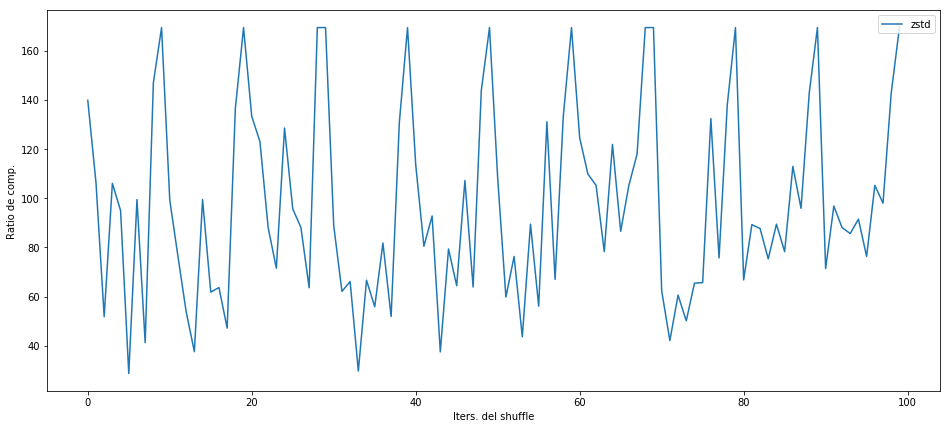

In [5]:
fig = plt.figure(figsize=(16, 7))

for code in [5]:
    cparams.compcode = code
    n = range(0,100)
    ratio = []
    speed = []    
   
    max = (0, 0, 0)
    
    for dw in div_w:
        for dh in div_h:
            s_image = np.empty((200,200), dtype=np.uint8).flatten()

            # Genera el suffle de la imagen

            cont = 0
            for i in range(width//dw):
                for j in range(heigth//dh):
                    s_image[cont*dw*dh:(cont+1)*dw*dh] = image[dw*i:dw*(i+1),dh*j:dh*(j+1)].reshape((1,dw*dh))
                    cont += 1

            start = t.perf_counter()

            schunk = cb2.blosc2_new_schunk(cparams, dparams)
            nchunks = cb2.blosc2_append_buffer(schunk, isize, s_image)
            nbytes = schunk.nbytes
            cbytes = schunk.cbytes

            end = t.perf_counter()

            ttotal = end - start

            r = (1. * nbytes) / cbytes
            s = nbytes / (ttotal * MB)
            if max[0] < r:
                max = (r, dw, dh)
            ratio.append(r)
            speed.append(s)
    
    plt.plot(n, ratio, label=cb2.blosc_compcode_to_compname(code)[1].decode("utf8"))
    
plt.ylabel("Ratio de comp.")
plt.xlabel("Iters. del shuffle")
plt.legend(loc = "upper right")
plt.show()

In [6]:
max

(169.4915254237288, 2, 200)

In [ ]:
f, axarr = plt.subplots(len(div), len(div), figsize=(3*len(div),3*len(div)))

for i, elem in enumerate(images_to_plot):
    axarr[i // tam, i % tam].imshow(elem, cmap='binary')
    axarr[i // tam, i % tam].set_title('Shuffle: ' + str(i))
    axarr[i // tam, i % tam].xaxis.set_major_locator(plt.NullLocator())
    axarr[i // tam, i % tam].yaxis.set_major_locator(plt.NullLocator())

for i in range(len(data_to_plot), tam * tam):
    axarr[i // tam, i % tam].set_visible(False)

plt.show()